C:\Users\HUSEYN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


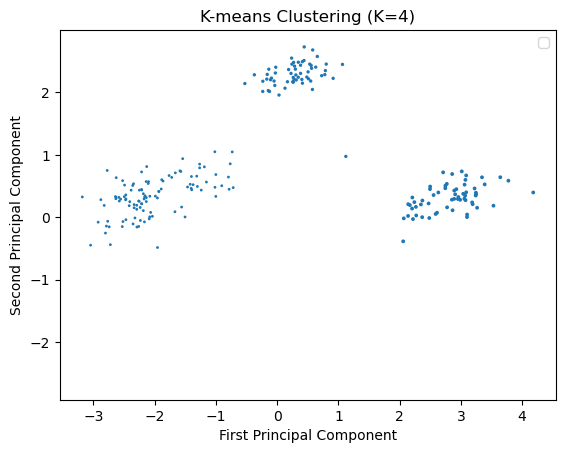

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,46.637037,17.500000,193.925926
1,49.692593,19.148148,203.074074
2,47.126087,15.560870,216.652174
3,45.563793,14.237931,212.706897
4,39.375556,17.682222,189.266667
5,43.897826,19.019565,194.565217
6,50.730769,15.810256,224.307692
7,36.348571,17.605714,185.000000
8,39.093939,19.209091,188.242424


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")

# dropping null values
penguins_df.isnull().sum()
penguins_clean=penguins_df.dropna()

# dropping outliers
penguins_clean[penguins_clean['flipper_length_mm']>4000]
penguins_clean[penguins_clean['flipper_length_mm']<0]
penguins_clean=penguins_clean.drop([9,14])
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)
df.head()

# scaling data
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed=pd.DataFrame(X, columns=df.columns)

pca=PCA()
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_>0.1)
n_components
pca=PCA(n_components=2)
penguins_pca=pca.fit_transform(penguins_preprocessed)

inertia = []

for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(penguins_pca)
    inertia.append(kmeans.inertia_)
# plt.plot(range(1,10),inertia) 
n_clusters=4

model=KMeans(n_clusters=n_clusters,random_state=42)
model.fit(penguins_pca)
labels=model.labels_
plt.scatter(penguins_pca[:,0],penguins_pca[:,1],labels)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

# result table
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

    
